In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [39]:
df = pd.read_csv('../data/customer_cleaned.csv')
df.shape

(60894, 13)

In [40]:
df.head()

,custid,sex,is_employed,income,marital_status,health_ins,housing_type,num_vehicles,age,state_of_res,gas_usage,rooms,recent_move_b
0,000007827_01,Female,2.0,23200.0,Divorced/Separated,True,Rented,0.0,82,Alabama,3.0,6,T
1,000008359_04,Female,1.0,21000.0,Never married,True,Homeowner with mortgage/loan,2.0,31,Alabama,40.0,3,F
2,000008529_01,Female,2.0,37770.0,Widowed,True,Homeowner free and clear,1.0,93,Alabama,120.0,2,F
3,000008744_02,Male,1.0,39000.0,Divorced/Separated,True,Rented,2.0,67,Alabama,3.0,2,F
4,000015018_01,Female,1.0,25800.0,Married,False,Rented,2.0,26,Alabama,3.0,3,F


In [41]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cat_columns = ['sex', 'marital_status', 'health_ins', 'housing_type', 'state_of_res', 'recent_move_b']

for col in cat_columns:
    df[col] = le.fit_transform(df[col])

df.head()

,custid,sex,is_employed,income,marital_status,health_ins,housing_type,num_vehicles,age,state_of_res,gas_usage,rooms,recent_move_b
0,000007827_01,0,2.0,23200.0,0,1,3,0.0,82,0,3.0,6,1
1,000008359_04,0,1.0,21000.0,2,1,1,2.0,31,0,40.0,3,0
2,000008529_01,0,2.0,37770.0,3,1,0,1.0,93,0,120.0,2,0
3,000008744_02,1,1.0,39000.0,0,1,3,2.0,67,0,3.0,2,0
4,000015018_01,0,1.0,25800.0,1,0,3,2.0,26,0,3.0,3,0


In [42]:
X = df.drop(['custid','health_ins'], axis=1)
y = df['health_ins']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
import seaborn as sns

def plot_measures(measures):
    parameters = measures.iloc[:,0]
    accuracy = measures.iloc[:,1]
    f1 = measures.iloc[:,2]

    sns.lineplot(x=parameters, y=accuracy, label='accuracy')
    sns.lineplot(x=parameters, y=f1, label='f1')


In [44]:
from sklearn.metrics import accuracy_score, f1_score
import time

max_depth: 3	accuracy: 0.89999178914525	f1: 0.9473638720829732	time: 0.05860114097595215
max_depth: 5	accuracy: 0.8999096805977502	f1: 0.9473183802238645	time: 0.12595200538635254
max_depth: 7	accuracy: 0.8987601609327531	f1: 0.9466071969860996	time: 0.12122607231140137
max_depth: 9	accuracy: 0.8968716643402578	f1: 0.9454766452509116	time: 0.12946009635925293
max_depth: 11	accuracy: 0.8869365300927826	f1: 0.9395070948469006	time: 0.1521291732788086
max_depth: 13	accuracy: 0.8726496428278184	f1: 0.9310881059226018	time: 0.1707141399383545
max_depth: 15	accuracy: 0.8592659495853519	f1: 0.9228483975513143	time: 0.18471217155456543
max_depth: 17	accuracy: 0.8501519008128746	f1: 0.9172373135005215	time: 0.1961991786956787
max_depth: 19	accuracy: 0.8396420067329009	f1: 0.9106628242074928	time: 0.20837783813476562
max_depth: None	accuracy: 0.8308563921504228	f1: 0.905051622418879	time: 0.21686720848083496


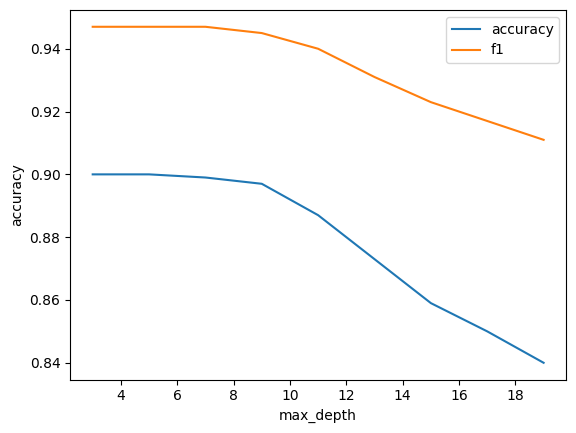

In [58]:
from sklearn.tree import DecisionTreeClassifier

dec_tree_measures = pd.DataFrame(columns=['max_depth', 'accuracy', 'f1', 'time_s'])
parameters = list(range(3, 20, 2)) + [None]

for max_depth in parameters:
    model = DecisionTreeClassifier(max_depth=max_depth)
    
    start_t = time.time()
    model.fit(X_train, y_train)
    time_spent = time.time() - start_t

    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    dec_tree_measures.loc[len(dec_tree_measures)] = [max_depth, round(acc,3), round(f1,3), round(time_spent,3)]

    print(f'max_depth: {max_depth}\taccuracy: {acc}\tf1: {f1}\ttime: {time_spent}')

plot_measures(dec_tree_measures)

n_estimators: 10	accuracy: 0.8840627309302899	f1: 0.9377150419056021	time: 0.5490717887878418
n_estimators: 50	accuracy: 0.8969537728877576	f1: 0.9453278152907864	time: 2.728175163269043
n_estimators: 100	accuracy: 0.8978569669102554	f1: 0.9459036354148548	time: 5.358949899673462
n_estimators: 200	accuracy: 0.8972822070777567	f1: 0.9455874037666913	time: 10.743681192398071
n_estimators: 500	accuracy: 0.8989243780277527	f1: 0.9464805878005305	time: 27.535677909851074


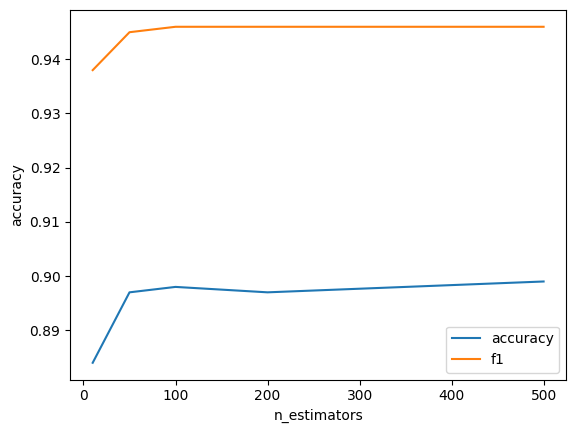

In [60]:
from sklearn.ensemble import RandomForestClassifier

rf_measures = pd.DataFrame(columns=['n_estimators', 'accuracy', 'f1', 'time_s'])
parameters = [10, 50, 100, 200, 500]

for n_estimators in parameters:
    model = RandomForestClassifier(n_estimators=n_estimators)
    
    start_t = time.time()
    model.fit(X_train, y_train)
    time_spent = time.time() - start_t

    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    rf_measures.loc[len(rf_measures)] = [n_estimators, round(acc,3), round(f1,3), round(time_spent,3)]

    print(f'n_estimators: {n_estimators}\taccuracy: {acc}\tf1: {f1}\ttime: {time_spent}')

plot_measures(rf_measures)

n_neighbors: 3	accuracy: 0.8752771163478118	f1: 0.9328143659604582	time: 0.12155795097351074
n_neighbors: 5	accuracy: 0.8882502668527794	f1: 0.9404193844941557	time: 0.05864691734313965
n_neighbors: 7	accuracy: 0.8917809343952705	f1: 0.9425457715780297	time: 0.05880093574523926
n_neighbors: 9	accuracy: 0.8949831677477625	f1: 0.9444227175944032	time: 0.058777809143066406
n_neighbors: 11	accuracy: 0.8974464241727563	f1: 0.9457875775858328	time: 0.05914616584777832
n_neighbors: 13	accuracy: 0.898431726742754	f1: 0.9463689572946022	time: 0.05929899215698242
n_neighbors: 15	accuracy: 0.8988422694802529	f1: 0.9466204506065858	time: 0.05908036231994629
n_neighbors: 17	accuracy: 0.8990064865752525	f1: 0.9467255717255717	time: 0.060829877853393555
n_neighbors: 19	accuracy: 0.8995812464077511	f1: 0.9470585688931215	time: 0.05863499641418457
n_neighbors: 21	accuracy: 0.8996633549552508	f1: 0.9471270335756317	time: 0.058676958084106445
n_neighbors: 23	accuracy: 0.8998275720502504	f1: 0.94721356870

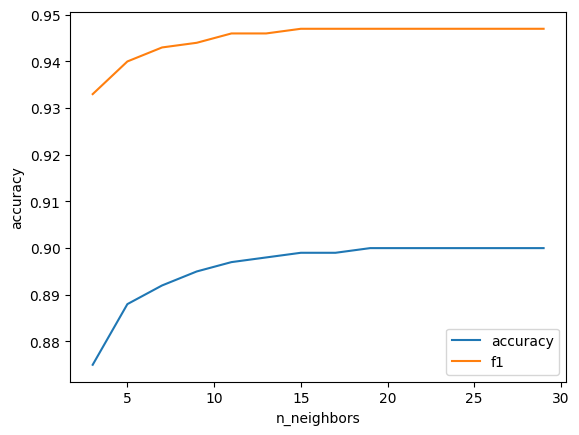

In [61]:
from sklearn.neighbors import KNeighborsClassifier

knn_measures = pd.DataFrame(columns=['n_neighbors', 'accuracy', 'f1', 'time_s'])
parameters = list(range(3, 31, 2))

for n_neighbors in parameters:
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    start_t = time.time()
    model.fit(X_train, y_train)
    time_spent = time.time() - start_t

    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    knn_measures.loc[len(knn_measures)] = [n_neighbors, round(acc,3), round(f1,3), round(time_spent,3)]

    print(f'n_neighbors: {n_neighbors}\taccuracy: {acc}\tf1: {f1}\ttime: {time_spent}')

plot_measures(knn_measures)